In [1]:
# Preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_excel (r'Superstore.xls')

## Task 4:
### Find out the monthy revenue and analyze the findings

#### a.) Create a column with Year and month field only give a suitable name to it.

In [2]:
order_date_year = data["Order Date"].dt.year
data['Year'] = pd.DataFrame(order_date_year)
order_date_month = data["Order Date"].dt.month
data['Month'] = pd.DataFrame(order_date_month)

monthly_data = data['Order Date'].dt.strftime('%Y-%m')
print("This is the column containing the Month and Year data.")
monthly_data.head()

This is the column containing the Month and Year data.


0    2016-11
1    2016-11
2    2016-06
3    2015-10
4    2015-10
Name: Order Date, dtype: object

#### b.) Create a separate dataset from the data which will have two columns, one which is created in step 'a' of this task and second the monthly sales/revenue

In [3]:
monthly_sales = data.groupby(['Year','Month'])['Sales'].sum()
newdata = pd.DataFrame(monthly_sales)

newdata1 = data.groupby(['Year','Month'])['Profit'].sum()
newdata1 = pd.DataFrame(newdata1)

result_month = newdata.merge(newdata1, left_index=True, right_index=True)
result_month.reset_index(inplace=True)
result_month['Date'] = pd.to_datetime(result_month[['Year','Month']].assign(DAY=1))
tempmonth = result_month
result_month = result_month.drop(columns=["Year","Month"])

print("This is the new dataset which contains the monthly sales/revenue.")
result_month.head()

This is the new dataset which contains the monthly sales/revenue.


,Sales,Profit,Date
0,14236.895,2450.1907,2014-01-01
1,4519.892,862.3084,2014-02-01
2,55691.009,498.7299,2014-03-01
3,28295.345,3488.8352,2014-04-01
4,23648.287,2738.7096,2014-05-01


#### c.) Plot this dataset

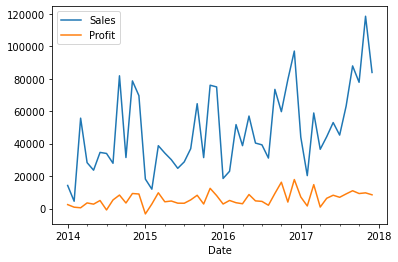

In [4]:
result_month.plot(x='Date',y=['Sales','Profit'])